<a id = "1"></a>
<div>
    <div style='float:left; width:55%; overflow:hidden'>
        <br><br><br><br>
        <span style = "float:right;">
        <h2><strong><span style='color:#17202a'> Forecasting and Time Series Analysis 📈 - LSTM 💥🔥 </span></strong></h2>
        <h4><b><span style="color:#273746"> Share Market Forecasting live data </span></b></h4> 
        <p><span style="color:#566573"> By Piyush Mahajan </span></p>
        <br>
        <b></b>
    </div>
    <div style="float:rigth; width:40%; max-height:300px; overflow: hidden;">
        <img src = 'https://i.pinimg.com/originals/65/56/d1/6556d1f996900f1b315db64ae955d524.png' width = '500px' height='300px'>
    </div>
</div>

**Hello Guys 🖐**

This is Simple Starter Notebook for **Share market forecasting using LSTM**. 

- The Purpose of this Project/Notebook is to help Invester in investing money in stock market (especially me 😅). 

- In This Notebook, I am Using yahoo finance library to extract 5 years of share market data of **TATAMOTORS** company (India) and for visualization purpose I am extensively using plotly because of its interactive plots.

- I am using 5 years **day-wise** data for building lstm, extracted from date 08-03-2017 to 02-03-2022

- If you are starting to learn Time Series data and model building, I hope this notebook will help you.

> **NOTE** I am using two libraries yfinance and yahoofinancials just because to explore 🚵‍♀️, you can use any one of them.

**<h3><span style="color: #f08ec9 ">About Dataset: </span></h3>**

1. **Open** - It is a Opening price of stock at that date.

2. **High** - The highest price reached by stock at that day.
3. **Low**- The Lowest price reached by stock at that day.
4. **Close** - It is the Closing price of stock that is, Price of stock at closing time of share market.
5. **Volume** - It is the total number of shares exchanged at that day. 

I am not going to used other two columns but they may be useful in forecasting but i am going to ignore them.

<a id='2'></a>
# <span style= "color: #5494ff " id = 'Table of content'>Table of Content</span>

<a id="toc"></a>
- [1. Introduction](#1)
- [2. Table of Content](#2)
- [1. Libraries](#3)
- [2. Importing and Creation of dataset](#4)
- [3. Exploring dataset and Visualization](#5)
    - [3.1 Changing Format of dataset](#5.1)
    - [3.2 Line and Candle Plot](#5.2)
    - [3.3 Volume plot](#5.3)
    - [3.4 Combinated Candle and Volume plot](#5.4)
    - [3.5 Box Plot](#5.5)
    - [3.6 Histogram for distribution on values](#5.6)
    - [3.7 Moving average line plot](#5.7)
    - [3.8 Manipulating dataset](#5.8)
- [4. Dataset Creation for LSTM](#6)
    - [4.1 Mean Value Dataset](#6.1)
    - [4.2 Volume Dataset](#6.2)
    - [4.2 Price Dataset having multiple values in target](#6.3)
    - [4.3 Price and Volume Combined dataset](#6.4)
- [5 Splitting dataset](#7)
    - [5.1 Splitting dataframe](#7.1)
    - [5.2 Splitting Combined data](#7.2)
- [6. Model Building](#8)
    - [6.1 Imports](#8.1)


<a id="3"></a>
# <span><center style="background-color: ; color: #5494ff ;"><strong>1. Libraries 📚</strong></center></span>

In [2]:
import yfinance as yf
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import numpy as np
import datetime
import os

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.figure_factory as ff


from plotly.subplots import make_subplots
from pandas_profiling import ProfileReport
from yahoofinancials import YahooFinancials
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

from colorama import Fore, Back, Style
y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
bl_ = Fore.BLACK

plt.rcParams['figure.figsize']=(15,8)
%matplotlib inline

RANDOM_SEED = 15
np.random.seed(15)

In [3]:
PATH = os.getcwd()

In [4]:
CSV_PATH = 'H:\\Excelr\\Project\\Stock_Prediction\\csv_files\\'

<a id = '4'></a>
# <span><center style=' color: #5494ff '><strong>2. Importing dataset 📈📊</strong></center></span>

In [5]:
tatamotors_5year = pd.read_csv(os.path.join(CSV_PATH,'Tatamotors_5years.csv'))
tatamotors_2m = pd.read_csv(os.path.join(CSV_PATH+'Tatamotors_2m.csv'))

In [6]:
tatamotors_2m.head(10)

,Datetime,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2022-01-20 09:15:00+05:30,519.950012,522.900024,518.299988,522.099976,281714,0,0
1,2022-01-20 09:17:00+05:30,522.150024,522.250000,520.250000,521.849976,332337,0,0
2,2022-01-20 09:19:00+05:30,521.750000,521.900024,518.150024,519.099976,465151,0,0
3,2022-01-20 09:21:00+05:30,519.250000,519.250000,517.000000,518.000000,420753,0,0
4,2022-01-20 09:23:00+05:30,518.000000,518.599976,517.650024,518.450012,198417,0,0
5,2022-01-20 09:25:00+05:30,518.450012,519.000000,517.799988,518.900024,171080,0,0
6,2022-01-20 09:27:00+05:30,518.599976,519.750000,518.200012,519.549988,135341,0,0
7,2022-01-20 09:29:00+05:30,519.599976,521.750000,519.349976,521.599976,216447,0,0
8,2022-01-20 09:31:00+05:30,521.700012,521.799988,521.049988,521.400024,192900,0,0
9,2022-01-20 09:33:00+05:30,521.349976,521.650024,521.000000,521.650024,122506,0,0


In [7]:
tatamotors_5year.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2017-03-08,469.399994,469.600006,461.149994,462.799988,5351597,0,0
1,2017-03-09,462.450012,469.700012,462.000000,467.600006,3837624,0,0
2,2017-03-10,471.000000,471.850006,465.100006,469.100006,5766815,0,0
3,2017-03-14,481.000000,483.000000,468.450012,469.750000,6348198,0,0
4,2017-03-15,475.000000,476.549988,470.649994,473.450012,4801312,0,0


In [8]:
tatamotors_5year.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
1231,2022-03-02,452.950012,454.250000,444.549988,447.600006,25791134,0,0
1232,2022-03-03,458.500000,458.500000,435.000000,437.100006,29599672,0,0
1233,2022-03-04,431.850006,431.850006,414.750000,417.250000,38765185,0,0
1234,2022-03-07,401.750000,401.750000,387.500000,394.000000,44836205,0,0
1235,2022-03-08,390.500000,395.450012,376.350006,391.750000,55526844,0,0


<a id="5"></a> 
# <span><center style="color: #5494ff "><strong>3. Exploring Dataset and Visualization </strong> </center></span>

<a id = "5.1"></a>
## **<span style = "color: #5494ff ;">3.1 Changing Format of dataset</span>**

- We have dataset of stock prices of TATAMOTORS, in which we have to change indexes to datetime that is setting Date Column as index

### **<span style= 'color: #5494ff '>Changing format of 1 year dataset</span>**

In [9]:
tatamotors_5year.Date[1]

'2017-03-09'

In [10]:
# tatamotors_5year['Date_1'] = tatamotors_5year.Date
tatamotors_5year['Date'] = pd.to_datetime(tatamotors_5year.Date)
tatamotors_5year['Index'] = tatamotors_5year.Date
tatamotors_5year=tatamotors_5year.set_index('Index')
# tatamotors_5year['Date']=tatamotors_5year.Date.astype('datetime64')

In [11]:
tatamotors_5year['Years'] = tatamotors_5year.Date.dt.year
tatamotors_5year['Months'] = tatamotors_5year.Date.dt.month
tatamotors_5year['Days'] = tatamotors_5year.Date.dt.day
tatamotors_5year['Day_name'] = tatamotors_5year.Date.dt.day_name()

In [12]:
tatamotors_5year.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1236 entries, 2017-03-08 to 2022-03-08
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          1236 non-null   datetime64[ns]
 1   Open          1236 non-null   float64       
 2   High          1236 non-null   float64       
 3   Low           1236 non-null   float64       
 4   Close         1236 non-null   float64       
 5   Volume        1236 non-null   int64         
 6   Dividends     1236 non-null   int64         
 7   Stock Splits  1236 non-null   int64         
 8   Years         1236 non-null   int64         
 9   Months        1236 non-null   int64         
 10  Days          1236 non-null   int64         
 11  Day_name      1236 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(6), object(1)
memory usage: 125.5+ KB


In [13]:
T = tatamotors_5year.index.max() - datetime.timedelta(weeks = 52)

In [14]:
tatamotors_5year['High'][T:].max(), tatamotors_5year['Low'][T:].min()

(536.7000122070312, 268.45001220703125)

In [15]:
tatamotors_5year.head()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Years,Months,Days,Day_name
Index,,,,,,,,,,,,
2017-03-08,2017-03-08,469.399994,469.600006,461.149994,462.799988,5351597,0,0,2017,3,8,Wednesday
2017-03-09,2017-03-09,462.450012,469.700012,462.000000,467.600006,3837624,0,0,2017,3,9,Thursday
2017-03-10,2017-03-10,471.000000,471.850006,465.100006,469.100006,5766815,0,0,2017,3,10,Friday
2017-03-14,2017-03-14,481.000000,483.000000,468.450012,469.750000,6348198,0,0,2017,3,14,Tuesday
2017-03-15,2017-03-15,475.000000,476.549988,470.649994,473.450012,4801312,0,0,2017,3,15,Wednesday


In [16]:
tatamotors_5year.groupby('Years').get_group(2021).High.max(axis = 0)

536.7000122070312

# <span><center style="color:#5494ff"><strong>4. Dataset Creation for LSTM</strong></center></span>

In [17]:
tatamotors_5year.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Years,Months,Days,Day_name
Index,,,,,,,,,,,,
2017-03-08,2017-03-08,469.399994,469.600006,461.149994,462.799988,5351597,0,0,2017,3,8,Wednesday
2017-03-09,2017-03-09,462.450012,469.700012,462.000000,467.600006,3837624,0,0,2017,3,9,Thursday
2017-03-10,2017-03-10,471.000000,471.850006,465.100006,469.100006,5766815,0,0,2017,3,10,Friday
2017-03-14,2017-03-14,481.000000,483.000000,468.450012,469.750000,6348198,0,0,2017,3,14,Tuesday
2017-03-15,2017-03-15,475.000000,476.549988,470.649994,473.450012,4801312,0,0,2017,3,15,Wednesday


In [18]:
def Time_series_dataset(data, time_step, columns, target_colm, values_in_target = 1, dataframe = False):
    '''
    This function returns two arrays one dataset and other target dataset.
    target dataset can be singular or multiples 
    - data : dataframe object consists of feature and target_colm
    - time_step : window size for building dataset
    - columns : list of columns that will be used as features
    - target_colm : list of target_colm 
    - values_in_target : It is the no of values should be in target columns of dataset
    '''
    n = len(columns)
    for i in range(data.shape[0]-time_step-values_in_target):
        values = data[columns][i:time_step+i].to_numpy().reshape(-1,time_step,n)

        target_value = data[target_colm].iloc[time_step+i:time_step+i+values_in_target,:].to_numpy()
        target_value = target_value.reshape(-1, target_value.shape[0], target_value.shape[1])
        if i == 0:
            dataset = values
            target_values = target_value
        else:
            dataset = np.concatenate((dataset, values))
            target_values = np.concatenate((target_values, target_value))
    if columns == target_colm and len(columns) == 1 and dataframe is True:
        dataset = dataset.reshape(dataset.shape[0], -1)
        target_values = target_values.reshape(dataset.shape[0], -1)
        data = pd.DataFrame(dataset)
        data['target'] = target_values
        return data
    else:
        if len(target_colm)==1:
            target_values = target_values.reshape(target_values.shape[0], -1)
        return dataset, target_values

<a id = '6.3'></a>
## **<span style= 'color: #5494ff '>4.3 Dataset Having Multiple values in target</span>**

<a id = '6.3.2'></a>
### **<span style= 'color: #5494ff '>4.3.2 Multiple Feature in Target with Multiple values</span>**

In [19]:
open_dataset_multi_target, target_multi_target = Time_series_dataset(tatamotors_5year, 80, ['Open', 'Volume']
        , ['Open', 'Volume'], values_in_target= 10)

In [20]:
open_dataset_multi_target.shape, target_multi_target.shape

((1146, 80, 2), (1146, 10, 2))

In [21]:
target_multi_target[0]

array([[4.28899994e+02, 5.05074900e+06],
       [4.35399994e+02, 4.03818800e+06],
       [4.34450012e+02, 5.31173000e+06],
       [4.46600006e+02, 1.15472100e+06],
       [4.52000000e+02, 1.20690060e+07],
       [4.61000000e+02, 6.05154000e+06],
       [4.64500000e+02, 4.38206300e+06],
       [4.60000000e+02, 3.97426900e+06],
       [4.55000000e+02, 4.92245300e+06],
       [4.52600006e+02, 2.34926800e+06]])

<a id = '7'></a>
# <span><center style="color:#5494ff"><strong>5. Split into Train, Test and Validation dataset</strong></center></span>

In [22]:
train_ratio = 0.7
validation_ratio = 0.15
test_ratio = 0.15

def Splitting_dataset(data, train_ratio = train_ratio, valid_ratio = None, target_variable = None):
    '''
    This Function Splits time series data into train, test and validation data with given percentages
    
    - train_ratio : percentage of data contained in training set
    - valid_ratio : percentage of data contained in validation set
    - target_variable : If given data does not contain final column as target column then provide target array

    Return:
    - If valid_ratio is provided the dataset will be split into 3 set with order as:
    x_train, x_val, x_test, y_train, y_val, y_test

    - If only train_ratio is provided the dataset will be divided into 2 sets as:
    x_train, x_test, y_train, y_test
    '''
    if target_variable is None:
        obs = data.shape[0]
        training_rows = int(obs*train_ratio)
        if valid_ratio:
            valid_rows = int(obs*valid_ratio)
            A = training_rows+valid_rows
            x_train, y_train = data.iloc[:training_rows,:-1].to_numpy(), data.iloc[:training_rows,-1].to_numpy()
            x_val, y_val = data.iloc[training_rows:A, :-1].to_numpy(), data.iloc[training_rows:A, -1].to_numpy()
            x_test, y_test = data.iloc[A:,:-1].to_numpy(), data.iloc[A:,-1].to_numpy()
            return x_train, x_val, x_test, y_train, y_val, y_test
        else:
            x_train, y_train = data.iloc[:training_rows,:-1].to_numpy(), data.iloc[:training_rows,-1].to_numpy()
            x_test, y_test = data.iloc[training_rows:, :-1].to_numpy(), data.iloc[training_rows:,-1].to_numpy()
            return x_train, x_test, y_train, y_test

    else:
        obs = data.shape[0]
        training_rows = int(obs*train_ratio)
        if valid_ratio:
            valid_rows = int(obs*valid_ratio)
            A = training_rows+valid_rows
            x_train, y_train = data[:training_rows], target_variable[:training_rows]
            x_val, y_val = data[training_rows:A], target_variable[training_rows:A]
            x_test, y_test = data[A:], target_variable[A:]
            return x_train, x_val, x_test, y_train, y_val, y_test
        else:
            x_train, y_train = data[:training_rows], target_variable[:training_rows]
            x_test, y_test = data[training_rows:], target_variable[training_rows:]
            return x_train, x_test, y_train, y_test






def transformation_min_max(data, min, max):
    data = (data - min)/(max- min)
    return data

<a id = '7.4'></a>
## **<span style= 'color: #5494ff '>5.4 Dataset with Multiple feature in target having Multi target values</span>**

In [23]:
x_train_multi_target, x_val_multi_target, x_test_multi_target, y_train_multi_target, y_val_multi_target, y_test_multi_target=Splitting_dataset(
        open_dataset_multi_target, target_variable= target_multi_target, valid_ratio=validation_ratio)

In [24]:
x_train_multi_target.shape, y_train_multi_target.shape, x_val_multi_target.shape, x_test_multi_target.shape

((802, 80, 2), (802, 10, 2), (171, 80, 2), (173, 80, 2))

In [25]:
x_train_multi_target.max(axis = (0,1))

array([4.82899994e+02, 2.15476711e+08])

In [26]:
U = pd.DataFrame(x_train_multi_target[:,:,0])
V = pd.DataFrame(y_train_multi_target[:,:,0])

U.shape

(802, 80)

In [27]:
pd.concat((U,V), axis = 1).iloc[:10,75:]

,75,76,77,78,79,0,1,2,3,4,5,6,7,8,9
0,443.899994,444.500000,433.899994,431.500000,434.200012,428.899994,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006
1,444.500000,433.899994,431.500000,434.200012,428.899994,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000
2,433.899994,431.500000,434.200012,428.899994,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000
3,431.500000,434.200012,428.899994,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000
4,434.200012,428.899994,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000,464.950012
5,428.899994,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000,464.950012,462.149994
6,435.399994,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000,464.950012,462.149994,457.200012
7,434.450012,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000,464.950012,462.149994,457.200012,459.000000
8,446.600006,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000,464.950012,462.149994,457.200012,459.000000,444.600006
9,452.000000,461.000000,464.500000,460.000000,455.000000,452.600006,453.000000,463.500000,460.000000,464.950012,462.149994,457.200012,459.000000,444.600006,446.250000


In [28]:
train_min_multi_target = x_train_multi_target.min(axis = (0,1))
train_max_multi_target = x_train_multi_target.max(axis = (0,1))

In [29]:
train_min_multi_target, train_max_multi_target

(array([6.650000e+01, 1.154721e+06]), array([4.82899994e+02, 2.15476711e+08]))

In [30]:
x_train_multi_target = transformation_min_max(x_train_multi_target, train_min_multi_target, train_max_multi_target)
x_test_multi_target = transformation_min_max(x_test_multi_target, train_min_multi_target, train_max_multi_target)
x_val_multi_target = transformation_min_max(x_val_multi_target, train_min_multi_target, train_max_multi_target)

y_train_multi_target = transformation_min_max(y_train_multi_target, train_min_multi_target, train_max_multi_target)
y_test_multi_target = transformation_min_max(y_test_multi_target, train_min_multi_target, train_max_multi_target)
y_val_multi_target = transformation_min_max(y_val_multi_target, train_min_multi_target, train_max_multi_target)

In [31]:
x_train_multi_target.shape, y_train_multi_target.shape, 

((802, 80, 2), (802, 10, 2))

In [32]:
(x_train_multi_target.max(axis = (0,1)), 
x_test_multi_target.max(axis = (0,1)), y_train_multi_target.max())

(array([1., 1.]), array([1.11659467, 0.91821967]), 1.0)

<a id = '8'></a>
# <span><center style="color:#5494ff"><strong>6. Model Building</strong></center></span>

<a id = "8.1"></a>
## **<span style = "color: #5494ff ;">6.1 Imports</span>**

In [33]:
import tensorflow as tf

from tensorflow.keras import Sequential, Model
from tensorflow.keras.callbacks import TensorBoard, EarlyStopping
from tensorflow.keras.layers import Dense, LSTM, GRU
from tensorflow.keras import layers
from tensorflow.keras.utils import plot_model

tf.random.set_seed(RANDOM_SEED)

In [34]:
MODEL_SAVE_PATH = './model_weights'

In [35]:
tf.config.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [36]:
def Prediction_fun(data, model, no_predictions):
    '''
    This function return array of forecast values given data and model,
    forecasts no_prediction steps
    '''
    predictions = []
    last_steps = data[-1]
    last_values = last_steps.reshape(-1, last_steps.shape[0], last_steps.shape[1])
    for i in range(no_predictions):
        prediction = model.predict(last_values)
        predictions.extend(prediction.tolist())
        prediction = prediction.reshape(-1, prediction.shape[0], prediction.shape[1])
        last_values = np.concatenate((last_values[:,1:,:], prediction), axis = 1)
    return np.array(predictions)

def Reverse_transform(max, min, values):
    values = values*(max - min) + min
    return values


def Evaluate_model(model, x_test, y_test, transform_max=None, transform_min = None, 
        x_val = None, y_val = None, no_prediction=None):
    
    original_y_test = Reverse_transform(transform_max, transform_min, y_test)

    if transform_max is not None:
        if x_val is not None:
            original_y_val = Reverse_transform(transform_max ,transform_min, y_val)
            print("The Model errors on validation dataset before reverse_transform is: ")
            print(f'{model.evaluate(x_val, y_val, verbose= 0)}')
            val_pred = Reverse_transform(transform_max, transform_min, model.predict(x_val))
            print("The Model Absolute error on validation dataset after reverse_transform is: ")
            print(f"{mean_absolute_error(original_y_val, val_pred)}")
            print('-~'*40)
            
        print("The Model errors on test dataset before reverse_transform is: ")
        print(f'{model.evaluate(x_test, y_test, verbose= 0)}')
        test_pred = Reverse_transform(transform_max, transform_min, model.predict(x_test))
        print("The Model Absolute error on test dataset after reverse_transform is: ")
        print(f"{mean_absolute_error(original_y_test, test_pred)}")
        ax = plt.plot(original_y_test, label = 'Test')
        ax.append(plt.plot(test_pred, label = 'Test_prediction'))
        if no_prediction:
            plot_prediction(x_test, y_test, model, transform_max, transform_min, no_prediction)
        plt.title('Test dataset')
        plt.legend()
        plt.show()

def plot_prediction(time_series_data, target,  model, d_max, d_min , no_prediction= 10):
    prediction = Prediction_fun(time_series_data, model, no_prediction)
    prediction = Reverse_transform(d_max, d_min, prediction)
    A = np.empty_like(target)
    A.fill(None)
    A = np.concatenate((A, prediction.ravel()))
    target = Reverse_transform(d_max, d_min, target)
    # plt.plot(target)
    ax = plt.plot(A, label = 'Future')
    return ax

<a id = "8.2"></a>
## **<span style = "color: #5494ff ;">6.2 Neural Model Building</span>**

### **<span style = "color: #5494ff ;">6.2.7 Model with dataset having Multiple feature & multiple values in target</span>**

In [37]:
x_train_multi_target.shape, y_train_multi_target.shape

((802, 80, 2), (802, 10, 2))

In [38]:
RANDOM_SEED

15

In [46]:
tf.random.set_seed(RANDOM_SEED)

inputs = tf.keras.Input(shape = (80,2))
x = LSTM(80, recurrent_regularizer= tf.keras.regularizers.L2(0.1),
        input_shape = (80,2), return_sequences= True )(inputs)
x = layers.Bidirectional(LSTM(80, recurrent_regularizer= tf.keras.regularizers.L2(0.05) ,return_sequences = True))(x)
x = layers.Bidirectional(LSTM(80))(x)


y = Dense(50, activation= 'relu')(x)
z = Dense(50, activation = 'relu')(x)
price_output = Dense(10, name = 'price_output')(y)
volume_output = Dense(10, name = 'volume_output')(z)

model_multi_target = Model(inputs = inputs, outputs = [price_output, volume_output])

In [77]:
model_multi_target.compile(optimizer= tf.keras.optimizers.Adam(learning_rate=0.0005),
    loss = tf.keras.losses.MeanSquaredError(), metrics = [tf.keras.losses.MeanAbsoluteError()])

tensor_board = TensorBoard('./logs/')

TypeError: unsupported operand type(s) for *: 'MeanSquaredError' and 'int'

In [48]:
model_multi_target.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 80, 2)]      0           []                               
                                                                                                  
 lstm_3 (LSTM)                  (None, 80, 80)       26560       ['input_2[0][0]']                
                                                                                                  
 bidirectional_2 (Bidirectional  (None, 80, 160)     103040      ['lstm_3[0][0]']                 
 )                                                                                                
                                                                                                  
 bidirectional_3 (Bidirectional  (None, 160)         154240      ['bidirectional_2[0][0]']  

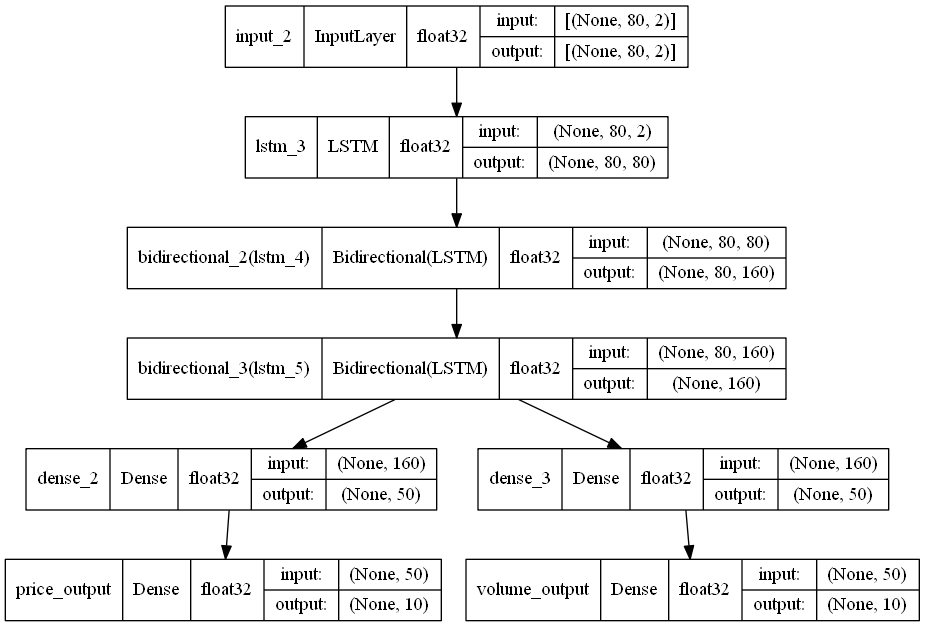

In [49]:
plot_model(model_multi_target, show_shapes=True, show_dtype= True)

In [50]:
y_train_multi_target[0,:,0]

array([0.870317  , 0.88592699, 0.88364558, 0.91282424, 0.92579252,
       0.94740635, 0.95581173, 0.94500482, 0.93299713, 0.92723346])

In [69]:
model_multi_target.fit(x_train_multi_target, (y_train_multi_target[:,:,0], y_train_multi_target[:,:,1]), epochs= 5, 
    validation_data= [x_val_multi_target, (y_val_multi_target[:,:,0], y_val_multi_target[:,:,1] )],
    callbacks = [tensor_board], shuffle= True)

Epoch 1/5
26/26 [==============================] - 5s 145ms/step - loss: 0.0110 - price_output_loss: 0.0018 - volume_output_loss: 0.0091 - price_output_mean_absolute_error: 0.0332 - volume_output_mean_absolute_error: 0.0549 - val_loss: 0.0889 - val_price_output_loss: 0.0186 - val_volume_output_loss: 0.0702 - val_price_output_mean_absolute_error: 0.1069 - val_volume_output_mean_absolute_error: 0.1477
Epoch 2/5
26/26 [==============================] - 3s 114ms/step - loss: 0.0111 - price_output_loss: 0.0022 - volume_output_loss: 0.0089 - price_output_mean_absolute_error: 0.0344 - volume_output_mean_absolute_error: 0.0556 - val_loss: 0.0911 - val_price_output_loss: 0.0203 - val_volume_output_loss: 0.0708 - val_price_output_mean_absolute_error: 0.1120 - val_volume_output_mean_absolute_error: 0.1489
Epoch 3/5
26/26 [==============================] - 3s 104ms/step - loss: 0.0107 - price_output_loss: 0.0018 - volume_output_loss: 0.0089 - price_output_mean_absolute_error: 0.0317 - volume_outpu

In [52]:
MODEL_SAVE_PATH

'./model_weights'

In [70]:
model_multi_target.save_weights(MODEL_SAVE_PATH+'/model_multi_target.h5')

In [71]:
model_multi_target.save(MODEL_SAVE_PATH+'/model_multi_target_whole.h5')

In [72]:
model_multi_target.save_spec()

([TensorSpec(shape=(None, 80, 2), dtype=tf.float32, name='input_2')], {})

In [73]:
y_test_multi_target.shape


(173, 10, 2)

In [74]:
model_multi_target.evaluate(x_test_multi_target, y=[y_test_multi_target[:,:,0], y_test_multi_target[:,:,1]])

6/6 [==============================] - 0s 41ms/step - loss: 0.0435 - price_output_loss: 0.0246 - volume_output_loss: 0.0189 - price_output_mean_absolute_error: 0.1152 - volume_output_mean_absolute_error: 0.0745


[0.04353918507695198,
 0.02464939095079899,
 0.018881266936659813,
 0.11524593830108643,
 0.07449506968259811]

In [75]:
x_test_multi_target[-1].shape

(80, 2)

In [76]:
price_predict, volume_predict = model_multi_target.predict(x_test_multi_target[-1].reshape(-1, 80,2))

In [60]:
train_max_multi_target

array([4.82899994e+02, 2.15476711e+08])

In [61]:
price_predict=Reverse_transform(train_max_multi_target[0], train_min_multi_target[0], price_predict.ravel())
volume_predict = Reverse_transform(train_max_multi_target[1], train_min_multi_target[1], volume_predict.ravel())

In [62]:
y_test_multi_target[-1][:,0]

array([1.01741114, 0.99435637, 0.99723825, 0.93527862, 0.90862155,
       0.90898176, 0.92807401, 0.94140251, 0.87740156, 0.80511529])

In [63]:
price_actual = Reverse_transform(train_max_multi_target[0], train_min_multi_target[0], y_test_multi_target[-1][:,0])
volume_actual = Reverse_transform(train_max_multi_target[1], train_min_multi_target[1], y_test_multi_target[-1][:,1])

In [64]:
volume_actual, price_actual

(array([22592161., 27957544., 17703998., 57265685., 48876182., 34475468.,
        25791134., 29599672., 38765185., 44836205.]),
 array([490.1499939 , 480.54998779, 481.75      , 455.95001221,
        444.8500061 , 445.        , 452.95001221, 458.5       ,
        431.8500061 , 401.75      ]))

In [65]:
x_test_multi_target[-1,:,0]

array([1.05487514, 1.02641691, 0.99783863, 1.0085255 , 1.05667629,
       1.00216137, 1.01657059, 1.02641691, 1.05307398, 1.0560759 ,
       1.06508167, 1.05775701, 1.0560759 , 1.05763689, 1.08969742,
       1.11659467, 1.07048513, 1.00360231, 1.03866476, 1.01897213,
       1.00744478, 0.93780021, 0.96073486, 0.9638569 , 0.99159462,
       0.99303556, 0.99327573, 0.98547073, 1.00384247, 1.03626322,
       1.01164747, 1.03974548, 1.02173395, 1.01176752, 1.02905861,
       1.01224785, 0.94476465, 0.92603269, 0.94056196, 0.98342941,
       0.9807877 , 0.95869361, 0.98150821, 0.99003364, 0.97514408,
       0.97550437, 1.02545631, 1.03338135, 1.00972627, 0.99663786,
       1.01717098, 1.02449571, 1.04827091, 1.0551153 , 1.05067245,
       1.06268013, 1.07660902, 1.10806924, 1.06508167, 1.08897699,
       1.06604227, 1.04034587, 0.978146  , 0.99483671, 1.04226707,
       1.05307398, 1.06027859, 1.06171953, 1.0629203 , 1.05019211,
       1.04803074, 1.03626322, 1.03266092, 1.05715663, 1.04887

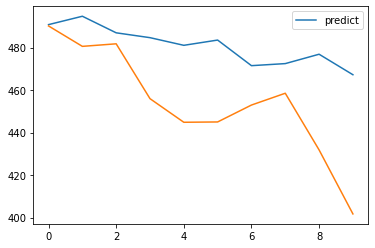

In [68]:
plt.plot(price_predict, label = 'predict')
plt.plot(price_actual)
plt.legend()